<a href="https://colab.research.google.com/github/keweiang/AISAnomalyDetection-Latest-ForMTC-/blob/main/Copy_of_tryCleanAISdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read every .txt in AIS data folder, give each column the attribute name and select those rows in October only, appended the .txt files

In [16]:
import pandas as pd
import numpy as np
import glob

all_data = pd.DataFrame()
for f in glob.glob("/content/drive/MyDrive/ShipMove/*.txt"):
    df = pd.read_csv(f, delimiter = ";",header=None, names = ['Date Time','Message ID', 'MMSI Number','Navigation Status','Rate of Turn','Speed Over Ground','Position Accuracy','Longitude','Latitude','Course Over Ground','Heading Angle','Timestamp','Channel of AIS','Repeat Indicator'])
    df=df[(df['Date Time']>= '2019-09-25') & (df['Date Time']<= '2019-10-04')]    #filter October 1 to October 4 data only -> 4 days data
    all_data = all_data.append(df,ignore_index=True)

Drop those less important features that cannot contribute to determine abnomalies, select those important features into AISdata.csv

In [17]:
from google.colab import files
all_data.drop(['Message ID', 'Navigation Status','Position Accuracy','Repeat Indicator'], inplace=True, axis = 1)
all_data

,Date Time,MMSI Number,Rate of Turn,Speed Over Ground,Longitude,Latitude,Course Over Ground,Heading Angle,Timestamp,Channel of AIS
0,2019-09-25 00:47:34.714526,566241000,0,0.0,103.687757,1.235233,178.6,48,45,A
1,2019-09-25 01:17:34.747775,566241000,0,0.0,103.687773,1.235203,178.6,49,45,A
2,2019-09-25 01:35:34.277209,566241000,0,0.0,103.687742,1.235223,178.6,49,45,A
3,2019-09-25 02:47:34.752767,566241000,0,0.0,103.687763,1.235233,178.6,49,45,A
4,2019-09-25 03:05:34.466400,566241000,0,0.0,103.687790,1.235210,178.6,49,45,A
...,...,...,...,...,...,...,...,...,...,...
2783768,2019-09-27 19:11:31.041697,248357000,0,16.3,103.972527,1.231805,82.1,83,29,A
2783769,2019-09-27 19:12:31.040949,248357000,0,16.3,103.977030,1.232343,82.9,82,29,A
2783770,2019-09-27 19:14:54.426594,248357000,0,16.2,103.987682,1.233683,83.1,82,52,A
2783771,2019-09-27 19:16:19.015192,248357000,0,16.1,103.994020,1.234497,82.8,82,17,A


In [18]:
MMSI=all_data['MMSI Number'].unique()
print(MMSI)

from numpy import savetxt
savetxt('MMSI.csv', MMSI, delimiter='\n')

[566241000 566218000 566282000 ... 248437000 248376000 248357000]


In [19]:
# remove duplicates
all_data.drop_duplicates()

,Date Time,MMSI Number,Rate of Turn,Speed Over Ground,Longitude,Latitude,Course Over Ground,Heading Angle,Timestamp,Channel of AIS
0,2019-09-25 00:47:34.714526,566241000,0,0.0,103.687757,1.235233,178.6,48,45,A
1,2019-09-25 01:17:34.747775,566241000,0,0.0,103.687773,1.235203,178.6,49,45,A
2,2019-09-25 01:35:34.277209,566241000,0,0.0,103.687742,1.235223,178.6,49,45,A
3,2019-09-25 02:47:34.752767,566241000,0,0.0,103.687763,1.235233,178.6,49,45,A
4,2019-09-25 03:05:34.466400,566241000,0,0.0,103.687790,1.235210,178.6,49,45,A
...,...,...,...,...,...,...,...,...,...,...
2783768,2019-09-27 19:11:31.041697,248357000,0,16.3,103.972527,1.231805,82.1,83,29,A
2783769,2019-09-27 19:12:31.040949,248357000,0,16.3,103.977030,1.232343,82.9,82,29,A
2783770,2019-09-27 19:14:54.426594,248357000,0,16.2,103.987682,1.233683,83.1,82,52,A
2783771,2019-09-27 19:16:19.015192,248357000,0,16.1,103.994020,1.234497,82.8,82,17,A


In [20]:
# filter data within Straits of Malacca and Singapore only
all_data=all_data[(((all_data['Longitude']>=103.4525)&(all_data['Longitude']<=104.3689))&((all_data['Latitude']>=1.1354)&(all_data['Latitude']<=1.6443)))|(((all_data['Longitude']>=98.025)&(all_data['Longitude']<=103.5121))&((all_data['Latitude']>=1.2107)&(all_data['Latitude']<=6.535)))]    
all_data


,Date Time,MMSI Number,Rate of Turn,Speed Over Ground,Longitude,Latitude,Course Over Ground,Heading Angle,Timestamp,Channel of AIS
0,2019-09-25 00:47:34.714526,566241000,0,0.0,103.687757,1.235233,178.6,48,45,A
1,2019-09-25 01:17:34.747775,566241000,0,0.0,103.687773,1.235203,178.6,49,45,A
2,2019-09-25 01:35:34.277209,566241000,0,0.0,103.687742,1.235223,178.6,49,45,A
3,2019-09-25 02:47:34.752767,566241000,0,0.0,103.687763,1.235233,178.6,49,45,A
4,2019-09-25 03:05:34.466400,566241000,0,0.0,103.687790,1.235210,178.6,49,45,A
...,...,...,...,...,...,...,...,...,...,...
2783768,2019-09-27 19:11:31.041697,248357000,0,16.3,103.972527,1.231805,82.1,83,29,A
2783769,2019-09-27 19:12:31.040949,248357000,0,16.3,103.977030,1.232343,82.9,82,29,A
2783770,2019-09-27 19:14:54.426594,248357000,0,16.2,103.987682,1.233683,83.1,82,52,A
2783771,2019-09-27 19:16:19.015192,248357000,0,16.1,103.994020,1.234497,82.8,82,17,A


In [21]:
all_data.info()
all_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2679441 entries, 0 to 2783772
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Date Time           object 
 1   MMSI Number         int64  
 2   Rate of Turn        int64  
 3   Speed Over Ground   float64
 4   Longitude           float64
 5   Latitude            float64
 6   Course Over Ground  float64
 7   Heading Angle       int64  
 8   Timestamp           int64  
 9   Channel of AIS      object 
dtypes: float64(4), int64(4), object(2)
memory usage: 224.9+ MB


(2679441, 10)

In [22]:
#filter speed (in knots)
all_data=all_data[(all_data['Speed Over Ground']<=216)]
all_data

,Date Time,MMSI Number,Rate of Turn,Speed Over Ground,Longitude,Latitude,Course Over Ground,Heading Angle,Timestamp,Channel of AIS
0,2019-09-25 00:47:34.714526,566241000,0,0.0,103.687757,1.235233,178.6,48,45,A
1,2019-09-25 01:17:34.747775,566241000,0,0.0,103.687773,1.235203,178.6,49,45,A
2,2019-09-25 01:35:34.277209,566241000,0,0.0,103.687742,1.235223,178.6,49,45,A
3,2019-09-25 02:47:34.752767,566241000,0,0.0,103.687763,1.235233,178.6,49,45,A
4,2019-09-25 03:05:34.466400,566241000,0,0.0,103.687790,1.235210,178.6,49,45,A
...,...,...,...,...,...,...,...,...,...,...
2783768,2019-09-27 19:11:31.041697,248357000,0,16.3,103.972527,1.231805,82.1,83,29,A
2783769,2019-09-27 19:12:31.040949,248357000,0,16.3,103.977030,1.232343,82.9,82,29,A
2783770,2019-09-27 19:14:54.426594,248357000,0,16.2,103.987682,1.233683,83.1,82,52,A
2783771,2019-09-27 19:16:19.015192,248357000,0,16.1,103.994020,1.234497,82.8,82,17,A


In [23]:
all_data.to_csv("AISdata.csv")
files.download("AISdata.csv")  
all_data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Date Time,MMSI Number,Rate of Turn,Speed Over Ground,Longitude,Latitude,Course Over Ground,Heading Angle,Timestamp,Channel of AIS
0,2019-09-25 00:47:34.714526,566241000,0,0.0,103.687757,1.235233,178.6,48,45,A
1,2019-09-25 01:17:34.747775,566241000,0,0.0,103.687773,1.235203,178.6,49,45,A
2,2019-09-25 01:35:34.277209,566241000,0,0.0,103.687742,1.235223,178.6,49,45,A
3,2019-09-25 02:47:34.752767,566241000,0,0.0,103.687763,1.235233,178.6,49,45,A
4,2019-09-25 03:05:34.466400,566241000,0,0.0,103.687790,1.235210,178.6,49,45,A
...,...,...,...,...,...,...,...,...,...,...
2783768,2019-09-27 19:11:31.041697,248357000,0,16.3,103.972527,1.231805,82.1,83,29,A
2783769,2019-09-27 19:12:31.040949,248357000,0,16.3,103.977030,1.232343,82.9,82,29,A
2783770,2019-09-27 19:14:54.426594,248357000,0,16.2,103.987682,1.233683,83.1,82,52,A
2783771,2019-09-27 19:16:19.015192,248357000,0,16.1,103.994020,1.234497,82.8,82,17,A


In [24]:
# check whether missing values in these columns
print(all_data.isnull().sum())

Date Time             0
MMSI Number           0
Rate of Turn          0
Speed Over Ground     0
Longitude             0
Latitude              0
Course Over Ground    0
Heading Angle         0
Timestamp             0
Channel of AIS        0
dtype: int64


In [25]:
all_data=all_data.dropna()    # Dropping missing values if exist
all_data.count()

Date Time             2679441
MMSI Number           2679441
Rate of Turn          2679441
Speed Over Ground     2679441
Longitude             2679441
Latitude              2679441
Course Over Ground    2679441
Heading Angle         2679441
Timestamp             2679441
Channel of AIS        2679441
dtype: int64

In [26]:
all_data.describe()

,MMSI Number,Rate of Turn,Speed Over Ground,Longitude,Latitude,Course Over Ground,Heading Angle,Timestamp
count,2.679441e+06,2.679441e+06,2.679441e+06,2.679441e+06,2.679441e+06,2.679441e+06,2.679441e+06,2.679441e+06
mean,5.165599e+08,5.956614e+01,3.608351e+00,1.036957e+02,1.274115e+00,1.993225e+02,2.806332e+02,3.143662e+01
std,9.858573e+07,7.156036e+01,6.790521e+00,1.714469e-01,7.025913e-02,1.112658e+02,1.726884e+02,1.792263e+01
min,2.000000e+08,-1.000000e+00,0.000000e+00,1.021711e+02,1.135400e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.252000e+08,0.000000e+00,0.000000e+00,1.036184e+02,1.227002e+00,1.044000e+02,1.220000e+02,1.600000e+01
50%,5.630289e+08,0.000000e+00,1.000000e-01,1.037117e+02,1.272050e+00,2.167000e+02,2.650000e+02,3.200000e+01
75%,5.647420e+08,1.280000e+02,6.200000e+00,1.037709e+02,1.304865e+00,2.950000e+02,5.110000e+02,4.700000e+01
max,7.777778e+08,2.550000e+02,1.023000e+02,1.043689e+02,1.888687e+00,3.600000e+02,5.110000e+02,6.300000e+01


In [ ]:
#Rate of turn (+-127) [-128 = not available]
# SOG (0-102.2) [102.3 = not available]
# COG (0-3599) [3600 = not available]
# Heading Angle (0-359) [511 = not available/default]
# Timestamp (0-59) [60 = not available/default ; 62 = electronic position fixing system operates in estimated mode ; 61 = manual input mode ; 63 = inoperative positioning system ]

Detect Outliers

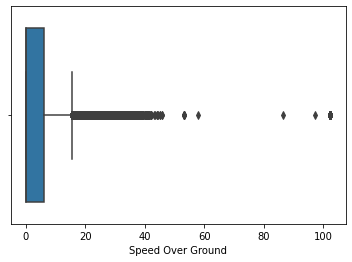

In [27]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

sns.boxplot(x=all_data['Speed Over Ground'])

In [34]:
all_data['Speed Over Ground'].describe()

count    2.679441e+06
mean     3.608351e+00
std      6.790521e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e-01
75%      6.200000e+00
max      1.023000e+02
Name: Speed Over Ground, dtype: float64

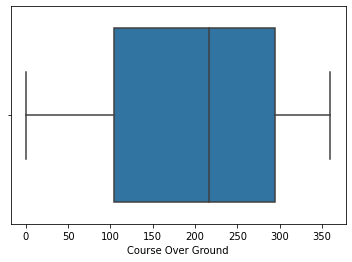

In [29]:
sns.boxplot(x=all_data['Course Over Ground'])

In [30]:
all_data['Course Over Ground'].describe()

count    2.679441e+06
mean     1.993225e+02
std      1.112658e+02
min      0.000000e+00
25%      1.044000e+02
50%      2.167000e+02
75%      2.950000e+02
max      3.600000e+02
Name: Course Over Ground, dtype: float64

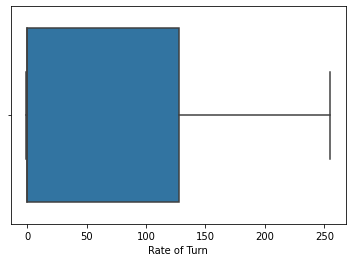

In [31]:
sns.boxplot(x=all_data['Rate of Turn'])

In [32]:
all_data['Rate of Turn'].describe()

count    2.679441e+06
mean     5.956614e+01
std      7.156036e+01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.280000e+02
max      2.550000e+02
Name: Rate of Turn, dtype: float64

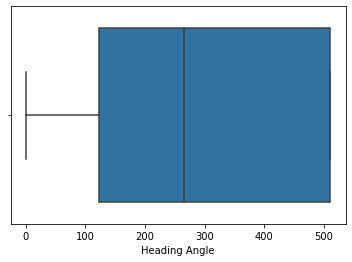

In [37]:
sns.boxplot(x=all_data['Heading Angle'])

In [35]:
all_data['Heading Angle'].describe()

count    2.679441e+06
mean     2.806332e+02
std      1.726884e+02
min      0.000000e+00
25%      1.220000e+02
50%      2.650000e+02
75%      5.110000e+02
max      5.110000e+02
Name: Heading Angle, dtype: float64

In [36]:
# Refer Tableau for Vessels in Maps

In [ ]:
# Bar graph(AIS type), Histogram(SOG)[for 1/2 MMSI]

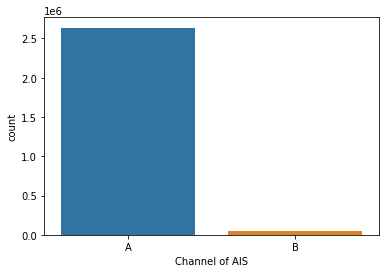

In [38]:
# Bar graph
sns.countplot(x='Channel of AIS',data=all_data)

In [39]:
all_data['Channel of AIS'].value_counts()

A    2636039
B      43402
Name: Channel of AIS, dtype: int64

In [40]:
# Histogram Line
MMSIvalue=all_data[all_data['MMSI Number']==566241000]
print(MMSIvalue.shape)

(1373, 10)


In [41]:
print(MMSIvalue['Speed Over Ground'])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1368    0.0
1369    0.0
1370    0.5
1371    0.9
1372    0.9
Name: Speed Over Ground, Length: 1373, dtype: float64


Text(0.5, 1.0, 'Speed Over Ground Record of 566241000 (MMSI Number) Vessel')

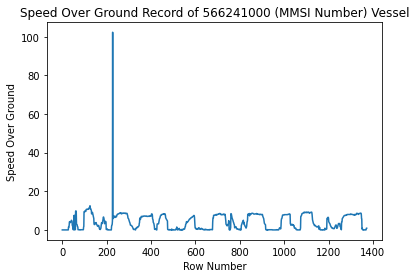

In [42]:
plt.plot(MMSIvalue['Speed Over Ground'])
plt.xlabel('Row Number')
plt.ylabel('Speed Over Ground')
plt.title('Speed Over Ground Record of 566241000 (MMSI Number) Vessel')

(373, 10)


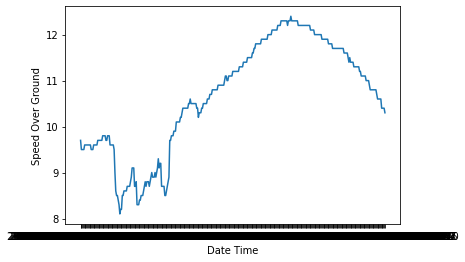

In [43]:
# Line graph
MMSIvalue2=all_data[all_data['MMSI Number']==636018003]
print(MMSIvalue2.shape)
sns.lineplot(x=MMSIvalue2['Date Time'],y=MMSIvalue2['Speed Over Ground'])